# PyTorch Computer Vision


## Computer Vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML Model
* `torch.utils.data.Dataset` - Base Dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a Dataset

In [1]:
# PyTorch
import torch
from torch import nn

# Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Matplotlib
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## Getting Dataset

The Dataset will be FashionMNIST

In [2]:
# Setup Training data
train_data = datasets.FashionMNIST(
    root="data", # Where to download data
    train=True, # Do we want the training set?
    download=True, # Download?
    transform=torchvision.transforms.ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels (y)
)

test_data = datasets.FashionMNIST(
    root="data", # Where to download data
    train=False, # Do we want the training set?
    download=True, # Download?
    transform=torchvision.transforms.ToTensor(), # How d  o we want to transform the data
    target_transform=None # How do we want to transform the labels (y)
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12261289.52it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 197865.40it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4040268.44it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1031248.30it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data)

60000

In [6]:
image, label = train_data[0]

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
print(image.shape)
print(class_names[label])

torch.Size([1, 28, 28])
Ankle boot


### Visualizing Data

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

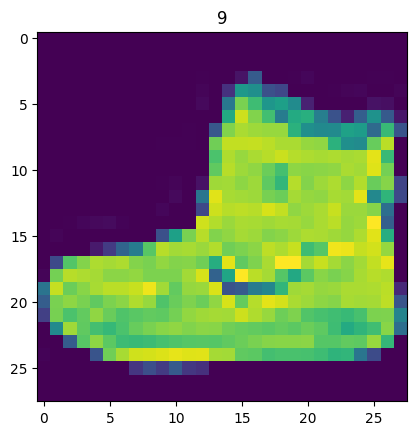

In [69]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

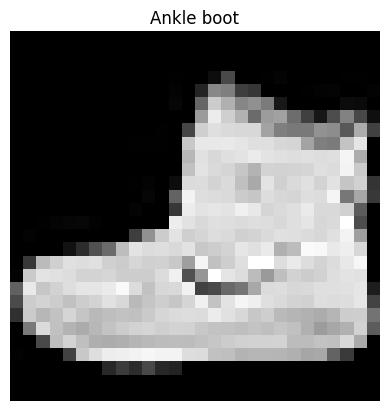

In [70]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

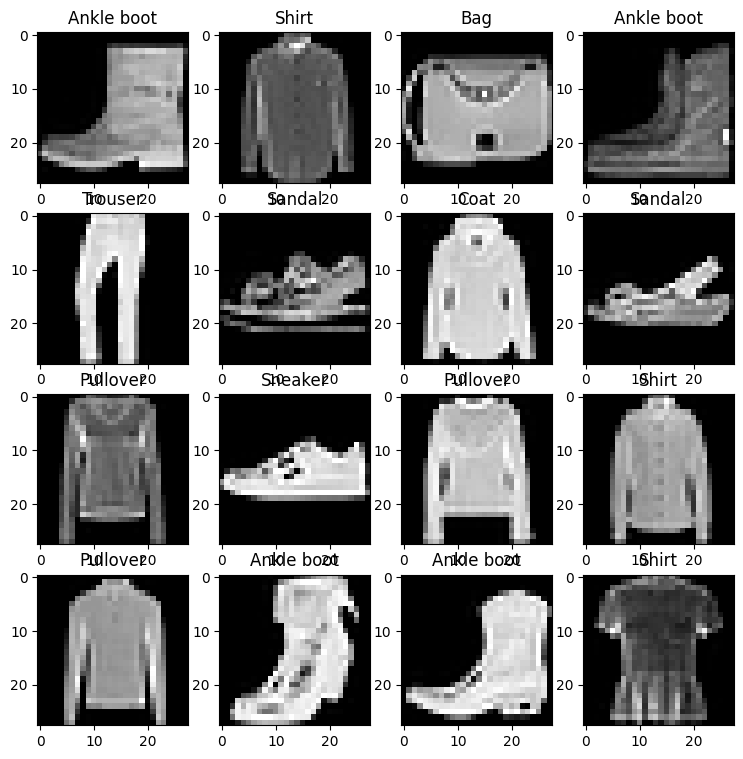

In [71]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols =4, 4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

## Prepare Dataloader

Right now our data is in the form of PyTorch Datasets

Dataloader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini batches)

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 Images in one hit. So we break it down to 32 images at a time (batchsize of 32)
2. It gives our neural network more chances to update its gradient per epoch

In [72]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32


train_dataloader = DataLoader(dataset= train_data,
                              batch_size= BATCH_SIZE,
                              shuffle= True)
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle= False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7daa6f3b99c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7daa6f3bbd60>)

In [73]:
# Check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_Dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_Dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7daa6f3b99c0>, <torch.utils.data.dataloader.DataLoader object at 0x7daa6f3bbd60>)
Length of train_Dataloader: 1875 batches of 32
Length of test_Dataloader: 313 batches of 32


In [74]:
# Checkout whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


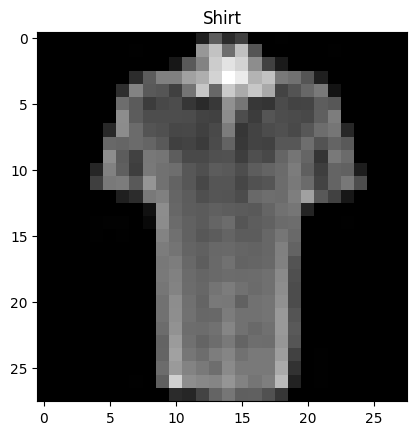

In [75]:
# Show sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# Model 0: Build a baseline model

When starting to build a series of ML modelling experiments, it's best practise to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments
In other words: start simply and add complexity when necessary.



In [76]:
# Create Flatten Layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x) # Perform forward pass

# Print out what happen's
print(f"Shape before flattening {x.shape} | Shape after flattening {output.shape}")

Shape before flattening torch.Size([1, 28, 28]) | Shape after flattening torch.Size([1, 784])


In [77]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack =  nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.Linear(hidden_units, output_shape),
    )

  def forward(self, x):
    return self.layer_stack(x)

In [78]:
torch.manual_seed(42)

# Setup Model
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28x28
    hidden_units=10,
    output_shape=len(class_names) # One for every class
).to("cpu")

model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [79]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [80]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Setup Loss, optimizer snd evaluating metrics

* Lossfunction - since we're working with multiclass data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [81]:
import requests
from pathlib import Path

# Download Helper Functions
if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Already exists


In [82]:
from helper_functions import accuracy_fn

# Setup Loss Fn and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    model_0.parameters(), lr=0.1,
)

### Create Function to Time our experiments

Machine Learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (Loss and Accuracy values etc)
2. How fast it runs

In [83]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on: {device}: {total_time:.3f} Seconds")
  return total_time


In [84]:
start_time = timer()
# Some code ...
end_time = timer()
print_train_time(start_time, end_time, "cpu")

Train time on: cpu: 0.000 Seconds


6.574800045200391e-05

### Creating a training loop and training model on batches of data

1. Loop trought epochs
2. Loop trought training batches, perform training steps, calculate the train loss *per batch*
3. Loop trought testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out whats happin'
5. Time it all

In [85]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set Epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  ### Training
  train_loss = 0
  # Add a Loop to loop throught the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calc Loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. Opt Zero grad
    optimizer.zero_grad()

    # 4. Loss Backward
    loss.backward()

    # 5. Opt Step
    optimizer.step()

    # Print
    if batch % 400 == 0:
      print(f"Looked at: {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by lenght of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward oass
      test_pred = model_0(X_test)

      # 2. Calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate Accuracy
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    # Calucalte the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calucalte the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Calc Training Time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test Accuracy: 82.0387
Epoch: 1
-------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test Accuracy: 83.1969
Epoch: 2
-------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test Accuracy: 83.4265
Train time on: cpu: 45.292 Seconds


## Make predictions and get Model 0 results

In [86]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dict containing the results of model predicting on data_loader"""
  loss, acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # Only works when model is created with a class
          "model_loss": loss.item(),
          "model_acc": acc
          }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)

model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Setup device agnostic code

In [87]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Model 1: Building a better model with non-linearity

In [88]:
# Create Model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)



In [89]:
# Create instance of Model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's available
next(model_1.parameters()).device


device(type='cpu')

In [90]:
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)


### Functionizing training and evaluation/testing loops

Let's create a Function for:
* Training loop - `train_step()`
* Testing loop - `test_step()`


In [91]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs Training step with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  model.train()

  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y,
                             y_pred.argmax(dim=1)) # Logits -> Predictions labels

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Optimizer Step
    optimizer.step()


  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  # Print out
  print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")

In [92]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Performs Testing step with model going over data_loader"""

  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      test_loss += loss_fn(y_pred, y)

      test_acc += accuracy_fn(y, y_pred.argmax(dim=1))


    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")


In [93]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Set seed and start timer
torch.manual_seed(42)
timer_start = timer()

# Set Epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn)

  test_step(model_1, test_dataloader, loss_fn, accuracy_fn)

timer_end = timer()

total_train_time_model_1 = print_train_time(timer_start, timer_end, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 1.09199 | Train Accuracy: 61.34%
Test Loss: 0.95636 | Test Accuracy: 65.00%

Epoch: 1
--------
Train Loss: 0.78101 | Train Accuracy: 71.93%
Test Loss: 0.72227 | Test Accuracy: 73.91%

Epoch: 2
--------
Train Loss: 0.67027 | Train Accuracy: 75.94%
Test Loss: 0.68500 | Test Accuracy: 75.02%

Train time on: cpu: 33.992 Seconds


**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. The hardware you're using has a better CPU in terms compute capability than the GPU.

For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [94]:
total_train_time_model_0

45.29240527899947

In [95]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [96]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dict containing the results of model predicting on data_loader"""
  loss, acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # Only works when model is created with a class
          "model_loss": loss.item(),
          "model_acc": acc
          }

In [97]:
# Get Model 1 Results Dictionary
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CCN)

CNN's are also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data.

In [98]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this...
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [99]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [100]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor = rand_image_tensor.to(device)

In [101]:
# Pass Image trough model
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

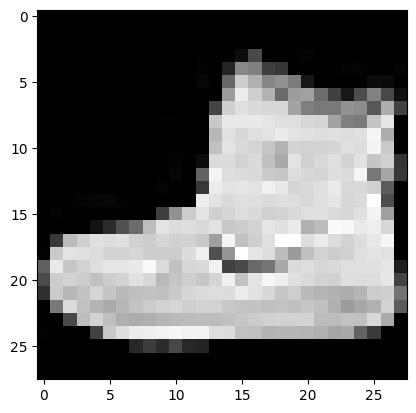

In [102]:
plt.imshow(image.squeeze(), cmap="gray")

### Steping trough `nn.Conv2d()`

In [103]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape {images.shape}")
print(f"Single Image shape {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape torch.Size([32, 3, 64, 64])
Single Image shape torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7

In [104]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride = 1,
                       padding=0)

# Pass the data trought the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### Stepping through `nn.MaxPool2d()`

In [105]:
print(f"Test Image original shape {test_image.shape}")
print(f"Test Image with unsqueezed dimension {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through conv_layer {test_image_through_conv.shape}")

# Pass Data through maxpool
test_image_thorough_conv_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer and maxpool {test_image_thorough_conv_maxpool.shape}")

Test Image original shape torch.Size([3, 64, 64])
Test Image with unsqueezed dimension torch.Size([1, 3, 64, 64])
Shape after going through conv_layer torch.Size([1, 10, 62, 62])
Shape after going through conv_layer and maxpool torch.Size([1, 10, 31, 31])


In [106]:
torch.manual_seed(42)
# Create a random Tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom Tensor: \n{random_tensor}")
print(f"\nRandom Tensor Shape: \n{random_tensor.shape}")

# Create MaxPool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass random Tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax Pool tensor: {max_pool_tensor}")
print(f"\nMax Pool tensor shape: {max_pool_tensor.shape}")


Random Tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random Tensor Shape: 
torch.Size([1, 1, 2, 2])

Max Pool tensor: tensor([[[[0.3367]]]])

Max Pool tensor shape: torch.Size([1, 1, 1, 1])


### Setup a Loss Function and Optimizer for `model_2`

In [107]:
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_2.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)


### Training and Testing our `Model_2`

In [108]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
start_timer = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)

  test_step(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

end_timer = timer()
total_train_time_model_2 = print_train_time(start=start_timer, end=end_timer, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.59518 | Train Accuracy: 78.38%
Test Loss: 0.39500 | Test Accuracy: 85.99%

Epoch: 1
---------
Train Loss: 0.36536 | Train Accuracy: 86.90%
Test Loss: 0.35244 | Test Accuracy: 86.91%

Epoch: 2
---------
Train Loss: 0.32588 | Train Accuracy: 88.13%
Test Loss: 0.32719 | Test Accuracy: 88.07%

Train time on: cpu: 181.660 Seconds


In [109]:
model_2_results = eval_model(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## Comparing model results and training time

In [110]:
import pandas as pd
compare_results = pd.DataFrame(
    [
        model_0_results,
        model_1_results,
        model_2_results
    ]
)
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [111]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,45.292405
1,FashionMNISTModelV1,0.685001,75.019968,33.992299
2,FashionMNISTModelV2,0.327190,88.069089,181.659837


Text(0, 0.5, 'model')

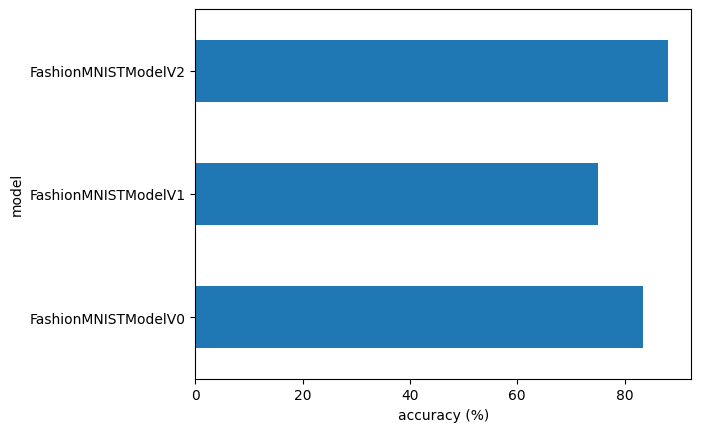

In [112]:
# Visualize our models results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## Make and Evaluate random predictions with best model

In [113]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare Samle (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass
      pred_logits = model(sample)

      # Get Prediction Probabilites (Logits -> Preds)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calcs
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

Text(0.5, 1.0, 'Pullover')

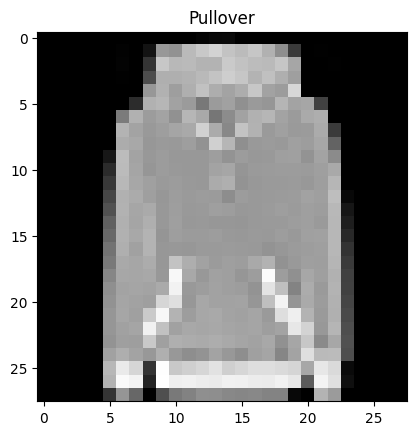

In [114]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View first sample shape
plt.imshow(test_samples[8].squeeze(), cmap="gray")
plt.title(class_names[test_labels[8]])

In [115]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two pred probs
pred_probs[:2]

tensor([[9.5222e-07, 8.4831e-07, 5.0250e-06, 1.4557e-04, 3.0455e-06, 4.9267e-03,
         1.6854e-07, 9.9462e-01, 2.3609e-04, 6.2520e-05],
        [2.2208e-05, 7.6346e-06, 7.2231e-06, 1.4130e-05, 6.7977e-06, 1.3816e-02,
         2.7732e-04, 9.2833e-04, 4.0005e-04, 9.8452e-01]])

In [116]:
# Convert to Labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 9, 7, 9, 1, 8, 3, 0, 2])

In [117]:
test_labels

[7, 9, 7, 9, 1, 8, 6, 6, 2]

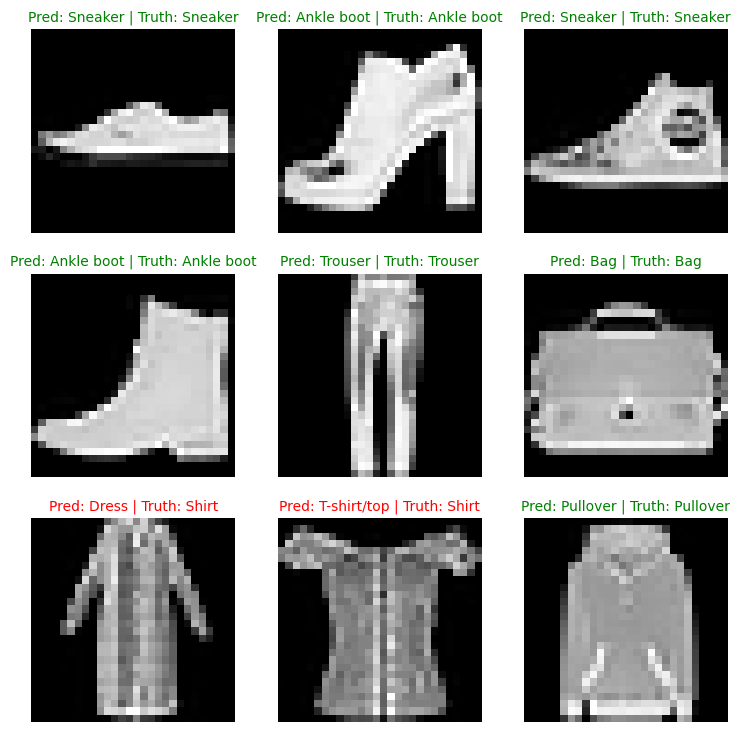

In [118]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create Subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find Prediction Labels in Text form
  pred_label = class_names[pred_classes[i]]

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # Green if pred is true
  else:
    plt.title(title_text, fontsize=10, c="r") # Red if pred is false

  plt.axis(False);

## Making a confiusion Matrix for further prediction evaluations

1. Make predictions with our trained model with our test_dataset
2. Make a Confiusion Matrix `torchmetrics.ConfiusionMatrix`
3. Plt the confiusion Matrix using `mlxtend.plotting.plot_confiusion_matrix()`

In [119]:
# Import tdqm.auto

# Make predictions with trained_model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # Do forward pass
    y_logit = model_2(X)

    # Turn pred from logits
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # Put pred to cpu
    y_preds.append(y_pred.cpu())

# Concatenate list of pred into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [120]:
# See if required Packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


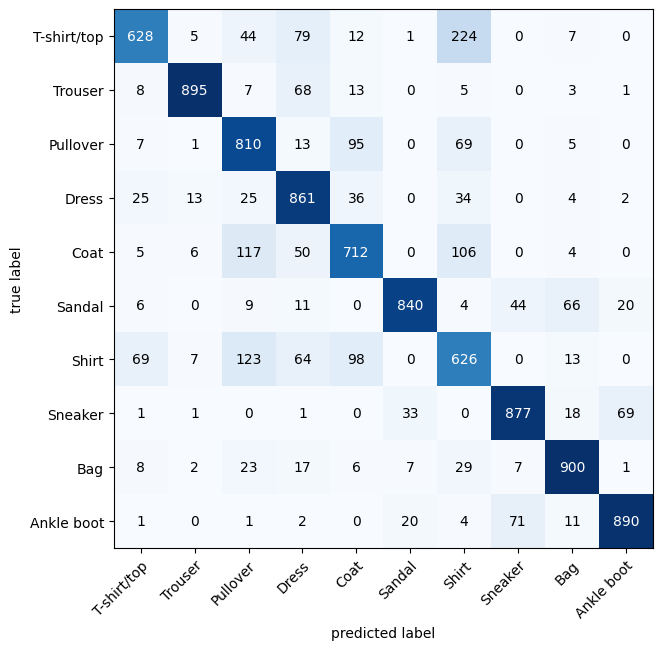

In [129]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confuison instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # Matplotlib likes working with numpy
    class_names = class_names,
    figsize=(10,7)
)

In [131]:
confmat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

## Save and load best performing Model

In [134]:
from pathlib import Path

# Create Model Pred
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create Model save path
MODEL_NAME = "model_2_fashionMNIST.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Print
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/model_2_fashionMNIST.pth


In [136]:
# Create new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [137]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [140]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [142]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)